<a href="https://colab.research.google.com/github/Elvira-03/Vani/blob/main/Essai2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rdkit

In [2]:
import rdkit

rdkit.__version__

'2023.09.6'

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem

#### Conertir mon smile en molécule rdkit

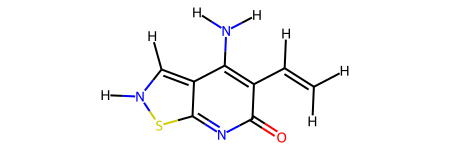

In [4]:
smi = 'NC1=C(C=C)C(=O)N=C2SNC=C12'
smi_key = 'Mol1'
m = Chem.MolFromSmiles(smi)
mole = AllChem.AddHs(m)
mole

#### Propriétés de ma molécule

In [5]:
from rdkit.Chem import Descriptors
import pandas as pd


Molwt = Descriptors.ExactMolWt(mole)
Averagemolwt=Descriptors.HeavyAtomMolWt(mole)
Solubility= Descriptors.MolLogP(mole)
Polarity = Descriptors.TPSA(mole)
Hbd = Descriptors.NumHDonors(mole)
Hba = Descriptors.NumHAcceptors(mole)

print(f'Some molecular properties are :\
      \n Molwt={Descriptors.ExactMolWt(mole)},\
      \n Averagemolwt={Descriptors.HeavyAtomMolWt(mole)},\
      \n Polarity={Descriptors.TPSA(mole)},\
      \n Solubility={Descriptors.MolLogP(mole)},\
      \n Hbd={Descriptors.NumHDonors(mole)},\
      \n Hba={Descriptors.NumHAcceptors(mole)}')


Descripteurs = [Molwt,Averagemolwt,Polarity,Solubility,Hbd,Hba]

df = pd.DataFrame(Descripteurs,['Molwt','Averagemolwt','Polarity','Solubility','Hbd','Hba'])
df

Some molecular properties are :      
 Molwt=193.030982844,      
 Averagemolwt=186.17499999999998,      
 Polarity=71.77000000000001,      
 Solubility=1.1614,      
 Hbd=2,      
 Hba=4


,0
Molwt,193.030983
Averagemolwt,186.175000
Polarity,71.770000
Solubility,1.161400
Hbd,2.000000
Hba,4.000000


#### Conformère avec rdkit

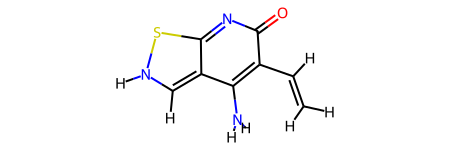

In [6]:
AllChem.EmbedMolecule(mole)
mole

#### Générer les coordonnées XYZ de la molécule non optimisée


In [7]:
block=Chem.MolToXYZBlock(mole)
blocklines='\n'.join(block.strip().split('\n')[1:])
print(blocklines)


N      0.159409   -1.621804   -0.479129
C     -0.013453   -0.263178   -0.140939
C      1.055264    0.599435   -0.159120
C      2.407269    0.127057   -0.463238
C      2.828495   -1.082919   -0.247556
C      0.969625    1.952154    0.133641
O      1.978375    2.686836    0.099406
N     -0.253016    2.447240    0.459049
C     -1.315389    1.619319    0.484146
S     -3.079570    1.904468    0.866606
N     -3.536838    0.202055    0.601406
C     -2.448304   -0.462102    0.265278
C     -1.296685    0.217226    0.193118
H      0.499067   -1.953154   -1.421207
H     -0.075513   -2.328055    0.280775
H      3.084664    0.861862   -0.908237
H      3.870210   -1.314386   -0.522523
H      2.275097   -1.878083    0.183571
H     -4.555369   -0.155663    0.715097
H     -2.553339   -1.558307    0.059854


#### Visualiser en 3D la molécule non optimisée

In [8]:
pip install py3Dmol

In [9]:
import py3Dmol

py3Dmol.__version__

'2.1.0'

In [10]:
def view3D(mole, label, fmt='mole'):
        """3D vizualisation of mol/xyz file with Py3DMol
        """

        view = py3Dmol.view(width=400, height=400)

        if fmt=='mole':
            view.addModel(Chem.MolToMolBlock(mole), fmt)
            # view.addModel(mol, fmt)
        elif fmt=='xyz':
            view.addModel(mole, fmt)

        view.setStyle({'stick': {}, 'sphere': {'scale': .30}})
        view.addLabel(label, {'position': {'x': -2, 'y': -3, 'z': 0}})

        view.zoomTo()
        view.show()

view3D(mole, f'{smi_key} RDKit Molecule')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

#### Optimisation

In [11]:
AllChem.MMFFOptimizeMolecule(mole)

0

On conclut que notre smile etait déjà optimisé

#### Générer les coordonnées XYZ de la molécule optimisée

In [12]:
block1=Chem.MolToXYZBlock(mole)
blocklines1='\n'.join(block1.strip().split('\n')[1:])
print(blocklines1)


N     -0.131786   -1.694595   -0.793748
C     -0.067553   -0.401745   -0.284300
C      1.013150    0.417313   -0.330942
C      2.294832    0.022045   -0.913748
C      3.044917   -1.011483   -0.507013
C      0.933291    1.858804    0.187689
O      1.909292    2.594086    0.063551
N     -0.228277    2.305600    0.776887
C     -1.221639    1.500274    0.828124
S     -2.796161    1.915217    1.485943
N     -3.424084    0.381962    1.196931
C     -2.483803   -0.372150    0.527136
C     -1.255106    0.123182    0.331067
H      0.774190   -2.058185   -1.083423
H     -0.602211   -2.346823   -0.170419
H      2.677146    0.686236   -1.688565
H      4.009347   -1.202915   -0.968897
H      2.743503   -1.663500    0.306660
H     -4.376426    0.296565    0.842616
H     -2.812621   -1.349888    0.194452


Nous constatons que les coordonnées sont différentes de celle obtenue
lorsque la molécule n'était pas encore optimisée

#### Visualiser en 3D la molécule optimisée

In [13]:
view3D(mole, f'{smi_key} RDKit Molecule')

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Ces représentations en 3D sont identques

#### Construction de l'objet moléculaire pyscf

In [14]:
pip install pyscf

In [15]:
import pyscf

pyscf.__version__

'2.5.0'

In [16]:
from pyscf import gto, scf, dft, tddft

mol=gto.Mole()
mol.atom= blocklines1
mol.unit='AU'
mol.basis='6-31G*'
mol.symmetry=True
mol.build()

#### Calcul de l'énergie de convergence ou totale en utilisant la DFT

In [17]:
mf = dft.RKS(mol)
mf.xc = 'b3lyp'
mf.kernel()

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:1102: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


converged SCF energy = -916.130810983288


-916.1308109832883

#### Détails sur les différentes énergies calculées avec la DFT

In [18]:
mf.scf_summary

{'e1': -4416.13490305392,
 'coul': 2004.137641688458,
 'exc': -114.58821621320047,
 'nuc': 1610.4546665953746}

#### Détails complets sur mon calcul en utilisant la verbose

In [19]:
mf.analyze(verbose=4)

**** SCF Summaries ****
Total Energy =                        -916.130810983288256
Nuclear Repulsion Energy =            1610.454666595374647
One-electron Energy =                -4416.134903053920425
Two-electron Coulomb Energy =         2004.137641688457961
DFT Exchange-Correlation Energy =     -114.588216213200468
**** MO energy ****
MO #1   energy= -88.7849841893273  occ= 2
MO #2   energy= -19.1598508409622  occ= 2
MO #3   energy= -14.4963525146889  occ= 2
MO #4   energy= -14.3913851867046  occ= 2
MO #5   energy= -14.3421702816678  occ= 2
MO #6   energy= -10.5366442695263  occ= 2
MO #7   energy= -10.528284490208   occ= 2
MO #8   energy= -10.4692264566657  occ= 2
MO #9   energy= -10.4553781798489  occ= 2
MO #10  energy= -10.3491004905001  occ= 2
MO #11  energy= -10.3009220579683  occ= 2
MO #12  energy= -10.2391724942349  occ= 2
MO #13  energy= -10.145914689224   occ= 2
MO #14  energy= -8.09282374686489  occ= 2
MO #15  energy= -6.05351126438803  occ= 2
MO #16  energy= -6.034494853498

((array([1.99976876e+00, 8.76892980e-01, 1.45048734e-02, 1.56901524e+00,
         1.43988217e+00, 1.61147814e+00, 3.33192904e-02, 3.42412319e-02,
         4.56367276e-02, 2.76463456e-03, 8.30495575e-03, 1.17813513e-02,
         9.95873418e-03, 1.00669676e-02, 1.99944016e+00, 3.68776946e-01,
         2.39576836e-02, 1.20637612e+00, 1.15727251e+00, 1.00090493e+00,
         1.58490099e-02, 1.46363174e-02, 4.25164816e-02, 1.62002268e-03,
         3.92317761e-03, 3.96145004e-03, 2.81768168e-03, 2.22513096e-03,
         1.99944624e+00, 4.47219705e-01, 2.42207968e-02, 1.26310070e+00,
         1.24091347e+00, 1.10569851e+00, 2.12114801e-02, 2.00032808e-02,
         5.32718972e-02, 3.51794011e-03, 3.15590474e-03, 5.74875063e-03,
         5.09179161e-03, 2.59305674e-03, 1.99952123e+00, 5.24074014e-01,
         1.88318692e-02, 1.21669911e+00, 1.20552740e+00, 1.18901905e+00,
         4.37662275e-02, 2.47872848e-02, 5.36482064e-02, 3.40648479e-03,
         3.68569249e-03, 7.58564380e-03, 3.70857135

#### Nombre d'orbitales moléculaires occupées ou nombre de transitions possible d'un électron dans l'espace donné

In [20]:
mf.mo_occ

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Index des Homo et Lumo

In [21]:
Lumo_idx = mf.mo_occ.tolist().index(0.)
Homo_idx = Lumo_idx - 1
print(f'Les index (Homo et Lumo) sont : {Homo_idx , Lumo_idx}')

Les index (Homo et Lumo) sont : (49, 50)


#### Visualisation graphique de mes index

In [22]:
try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px

# Plot the MO Occupations
fig = px.line(y=mf.mo_occ, markers=True, title="Molecular Orbital (MO) Occupations")
fig.update_layout(xaxis_title="Orbital Index (0-Based)", yaxis_title="MO Occupation")
fig.show()

#### Calcul des énergies Homo, Lumo et gap ($ΔE_{Homo-Lumo}$)
Sachant que : $ΔE_{Homo-Lumo} = |E_{Homo} - E_{Lumo}| $

In [23]:
from pyscf.data.nist import HARTREE2EV as au2ev

print(f'Energie du Homo = {mf.mo_energy[Homo_idx] * au2ev} eV')
print(f'Energie de Lumo = {mf.mo_energy[Lumo_idx] * au2ev} eV')
print(f'Energie du gap Homo-Lumo = {abs(mf.mo_energy[Homo_idx] - mf.mo_energy[Lumo_idx]) * au2ev} eV')

Energie du Homo = -1.1530560595404882 eV
Energie de Lumo = 0.2449369622832596 eV
Energie du gap Homo-Lumo = 1.3979930218237475 eV


In [24]:
E_Homo = mf.mo_energy[Homo_idx] * au2ev
E_Lumo = mf.mo_energy[Lumo_idx] * au2ev

In [25]:
E_gap = abs(mf.mo_energy[Homo_idx] - mf.mo_energy[Lumo_idx]) * au2ev
E_gap

1.3979930218237475

#### Calcul de la longueur d'onde en nm

In [26]:
wavelength_m = (12400 / E_gap)
print(f'Longueur d onde = {wavelength_m * 0.1} nm')

Longueur d onde = 886.9858294302227 nm


Cette longueur d'onde n'appartient pas au domaine du visible

#### Calcul des différents états excités en utilisant la TDDFT

In [27]:
mytd = tddft.TDDFT(mf)
mytd.kernel()

Excited State energies (eV)
[0.40377868 1.15306158 1.44727367]


(array([0.01483859, 0.04237423, 0.05318633]),
 [(array([[-9.55899119e-08,  4.41536915e-08,  1.41758850e-07, ...,
            8.05306963e-08,  2.37203299e-07, -1.50119970e-07],
          [-7.63672616e-06,  1.83938124e-06, -3.50469592e-07, ...,
           -9.40963749e-07,  3.46217383e-06, -1.07023641e-07],
          [-2.45699128e-06,  7.87378587e-07,  1.40982087e-07, ...,
            2.30773091e-07, -5.77559024e-07,  8.55382197e-08],
          ...,
          [ 6.51719711e-03, -1.25115148e-02,  1.41006364e-03, ...,
           -3.81339129e-06,  1.36314206e-06, -3.67715968e-07],
          [ 1.64077452e-01, -6.18384715e-03,  5.92145120e-04, ...,
           -6.98495604e-06, -3.67199156e-06, -1.23898899e-05],
          [-8.09501529e-01,  5.86970149e-04, -5.65133099e-02, ...,
            7.15144026e-06, -5.64907504e-08,  1.37798291e-06]]),
   array([[ 1.14274535e-07,  4.65759840e-08,  2.01238358e-07, ...,
            9.08250243e-08,  2.09384372e-07, -1.59376914e-07],
          [ 1.45841387e-05,

In [28]:
mytd.analyze(verbose=5)


** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      0.40378 eV   3070.60 nm  f=0.0006
      49 -> 51        0.16408
      50 -> 51       -0.80950
Excited State   2:    A      1.15306 eV   1075.26 nm  f=0.0131
      50 -> 52        0.70395
Excited State   3:    A      1.44727 eV    856.67 nm  f=0.0033
      49 -> 51        0.68535
      50 -> 51        0.20090

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.1983     -0.1339      0.0386      0.0587      0.0006
  2        -0.3686      0.2556     -0.5115      0.4629      0.0131
  3         0.2839      0.1058      0.0125      0.0920      0.0033

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.0251     -0.0071     -0.0032      0.0007      0.0310
  2        -0.0177      0.0104     -0.0176      0.0007      0.0115
  3         0.0235      

#### Calcul des différents états excités en utilisant la TDA

In [29]:
mytda = tddft.TDA(mf)
mytda.kernel()

Excited State energies (eV)
[0.84680368 1.19117101 1.75959937]


(array([0.03111946, 0.04377473, 0.06466408]),
 [(array([[-1.03699380e-07,  1.08741641e-07,  3.69526506e-07, ...,
            2.10411590e-07,  4.87083807e-07, -3.35283716e-07],
          [-1.27372486e-05,  2.70875260e-06,  2.08608772e-07, ...,
           -2.63657882e-06,  6.48219302e-06, -4.29713701e-07],
          [-3.99124708e-06,  1.71806341e-06, -2.69793847e-07, ...,
            2.94822371e-07, -1.06592831e-06,  2.55178639e-07],
          ...,
          [ 1.10806035e-02, -2.39984236e-02,  3.39591835e-03, ...,
           -9.43142871e-06,  4.10861084e-06,  6.78346460e-07],
          [ 3.97535152e-01, -1.11548025e-02,  9.64728908e-03, ...,
           -7.02441787e-06, -1.49818612e-05, -1.94352083e-05],
          [-5.73303150e-01,  1.01958461e-02, -7.33814861e-02, ...,
            2.26905813e-05, -4.12109867e-06, -1.26104908e-06]]),
   0),
  (array([[ 2.89330938e-08, -9.22816037e-08,  1.62153882e-08, ...,
            6.23704063e-09,  1.08490016e-08, -1.65110858e-09],
          [-1.813371

#### Détails sur les différentes énergies des états excités singulets après un calcul TDA

In [30]:
mytda.analyze(verbose=5)


** Singlet excitation energies and oscillator strengths **
Excited State   1:    A      0.84680 eV   1464.14 nm  f=0.0030
      49 -> 51        0.39754
      50 -> 51       -0.57330
Excited State   2:    A      1.19117 eV   1040.86 nm  f=0.0190
      50 -> 52        0.70189
Excited State   3:    A      1.75960 eV    704.62 nm  f=0.0119
      49 -> 51        0.56040
      50 -> 51        0.34511
      50 -> 53        0.20312

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1        -0.3057     -0.2224      0.0548      0.1459      0.0030
  2        -0.4360      0.3093     -0.6052      0.6520      0.0190
  3         0.4649      0.2432     -0.0146      0.2755      0.0119

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.1722      0.1181     -0.0280      0.0444      0.9506
  2         0.0530     -0.0556      0.1016      0.0162      0

#### Calcul des différentes énergies des états excités singulets

In [31]:
ee_singlets = mytda.e

#### Énergie de l'état fondamentale $ S_0 $

In [32]:
S0 = min(ee_singlets)
print(f'Énergie fondamentale est : {S0}')

Énergie fondamentale est : 0.031119461353195453


#### Énergie du 1er état excité singulet $ S_1 $

In [33]:
S1 = sorted(ee_singlets)[1]
print(f'Énergie du 1er état excité singulet est : {S1}')

Énergie du 1er état excité singulet est : 0.04377472764503196


#### Force d'oscillateur sans unité

In [34]:
OS_singlets = mytda.oscillator_strength(gauge='length')

#### Détails sur les différentes énergies des états excités triplets après un calcul TDA

In [35]:
mytda.singlet = False
mytda.kernel()

Excited State energies (eV)
[0.90548679 0.93116247 1.89541941]


(array([0.03327603, 0.03421959, 0.06965538]),
 [(array([[-3.54741089e-07,  3.44437848e-09, -1.30501752e-07, ...,
            3.06156702e-08,  4.71742993e-08, -1.15675820e-08],
          [ 9.15757519e-06, -6.86486487e-07,  6.69701093e-07, ...,
           -6.38562531e-07,  4.45730369e-07,  1.61599024e-07],
          [-3.23191131e-06,  5.32374758e-07, -3.37417356e-06, ...,
            8.26907179e-07, -7.71360362e-07,  1.77146071e-07],
          ...,
          [ 2.93292536e-03, -2.00022789e-02,  4.30598469e-03, ...,
            7.01164349e-06, -6.14891047e-06,  4.16103349e-07],
          [ 7.00303073e-01, -3.28313698e-02,  2.82321073e-02, ...,
           -1.42114327e-05, -4.28485515e-06,  2.15219978e-05],
          [-4.89441068e-02, -4.48997050e-02, -8.05615142e-04, ...,
           -6.90519979e-06,  1.81741787e-06,  6.72620386e-06]]),
   0),
  (array([[ 2.78819284e-08, -3.23545397e-08,  4.74218592e-08, ...,
            3.25196837e-09, -7.41302242e-10,  1.87500368e-11],
          [ 1.245280

#### Détails sur les différentes énergies des états excités triplets après un calcul TDA

In [36]:
mytda.analyze(verbose=5)


** Triplet excitation energies and oscillator strengths **
Excited State   1:    A      0.90549 eV   1369.25 nm  f=0.0136
      49 -> 51        0.70030
Excited State   2:    A      0.93116 eV   1331.50 nm  f=0.0278
      50 -> 52       -0.70241
Excited State   3:    A      1.89542 eV    654.13 nm  f=0.0003
      49 -> 52        0.69733

** Transition electric dipole moments (AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.7270      0.2875     -0.0270      0.6119      0.0136
  2         0.5855     -0.4253      0.8337      1.2187      0.0278
  3        -0.0806      0.0236     -0.0113      0.0072      0.0003

** Transition velocity dipole moments (imaginary part, AU) **
state          X           Y           Z        Dip. S.      Osc.
  1         0.0603      0.0269     -0.0093      0.0045      0.0892
  2         0.0292     -0.0214      0.0400      0.0029      0.0568
  3        -0.0020     -0.0079      0.0160      0.0003      0.0031

** Transition ma

#### Énergie du 1er état triplet

In [37]:
ee_triplets = mytda.e
T1 = min(ee_triplets)
print(f'Énergie du 1er état triplet est : {T1}')

Énergie du 1er état triplet est : 0.03327602599401798


#### Énergie de fluorescence

In [40]:
f_energy = (S1 - S0)*au2ev
print(f'Énergie de fluorescence est : {f_energy} eV')

Énergie de fluorescence est : 0.3443673362530571 eV


#### Énergie de gap(Singulet-triplet) :
$ ΔE_{S-T} = S_1 - T_1$

In [41]:
gap_ST = (S1 - T1)*au2ev
print(f'Gap(Singulet-triplet) est : {gap_ST} eV')

Gap(Singulet-triplet) est : 0.2856842233345527 eV


#### Force d'oscillateur

In [42]:
OStr = OS_singlets[0]
print(f'Force d oscillateur est : {OStr}')

Force d oscillateur est : 0.0030263868918265924


#### Durée de vie

In [52]:
time_au = 2.4188843265857E-17
tau_au = 2.3046*(10^(-8)) /  ((f_energy**2) * OStr)
tau = tau_au * time_au * 1e9
print(f'Durée de vie est : {tau} ns')

Durée de vie est : -0.002174554736562725 ns


In [48]:
import numpy as np

#### Fonction multiobjective

In [49]:
mobj = OStr - gap_ST - np.abs(f_energy - 3.2)
print(f'Fonction multiobjective est : {mobj} eV')

Fonction multiobjective est : -3.1382905001896693 eV


#### Tableau récapitulatif de mes différents calculs

In [50]:
# Définition des listes de résultats
list_results_TDA = [
    E_Homo,
    E_Lumo,
    E_gap,
    f_energy,
    gap_ST,
    OStr,
    tau,
    mobj
]

# Création des dictionnaires
dict_results_TDA = {'eV/ns': list_results_TDA}

# Création du DataFrame
index = [
    'Homo energy',
    'LUMO energy',
    'Gap energy',
    'Fluorescence energy',
    'Singlet-Triplet gap',
    'Oscillator strength',
    'Lifetime',
    'Multi-Obj'
]

df_TDA = pd.DataFrame(dict_results_TDA)
df_TDA.index = index

# Affichage du DataFrame
df_TDA

,eV/ns
Homo energy,-1.153056
LUMO energy,0.244937
Gap energy,1.397993
Fluorescence energy,0.344367
Singlet-Triplet gap,0.285684
Oscillator strength,0.003026
Lifetime,-0.002175
Multi-Obj,-3.138291
